# Binary oversampling

This notebook presents the general usecase of the ```smote_variants``` package, namely, the oversampling of binary classification datasets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import smote_variants as sv
import imbalanced_databases as imbd

In [2]:
# loading the dataset
dataset= imbd.load_iris0()
X, y= dataset['data'], dataset['target']

## Illustrating the imbalanced nature

The imbalanced nature of the ```iris0``` dataset is illustrated by plotting the first two coordinates, the colors of the scatter plot indicating the minority ('olive') and majority ('orange') classes.

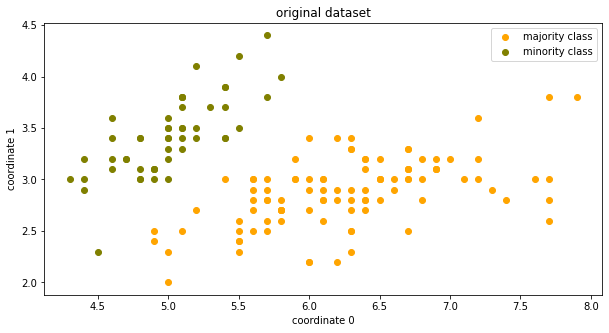

In [3]:
plt.figure(figsize=(10, 5))
plt.scatter(X[y == 0][:,0], X[y == 0][:,1], label='majority class', c='orange')
plt.scatter(X[y == 1][:,0], X[y == 1][:,1], label='minority class', c='olive')
plt.title('original dataset')
plt.xlabel('coordinate 0')
plt.ylabel('coordinate 1')
plt.legend()

In [4]:
# printing the number of samples

print('majority class: %d' % np.sum(y == 0))
print('minority class: %d' % np.sum(y == 1))

majority class: 100
minority class: 50


## Oversampling

The oversampling is carried out by instantiating any oversampler implemented in the package and calling the ```sample``` function.

In [5]:
oversampler= sv.SMOTE(random_state=5)
X_samp, y_samp= oversampler.sample(X, y)

2022-07-03 19:45:44,512:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'random_state': 5}")
2022-07-03 19:45:44,516:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-07-03 19:45:44,517:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski


## Illustrating the oversampled dataset

The oversampled dataset is illustrated by printing the number of samples after oversampling. The newly generated samples can be filtered by removing the first ```len(X)``` elements of the oversampled dataset. Note that this filtering works only with *extensive* techniques, namely, with oversamplers which only add samples to the dataset. There are multiple oversamplers which also remove noisy samples, with these oversamplers there is no way to filter newly generated samples.

In [6]:
# printing the number of samples
print('majority class: %d' % np.sum(y_samp == 0))
print('minority class: %d' % np.sum(y_samp == 1))

majority class: 100
minority class: 100


In [7]:
# filtering new samples
X_samp, y_samp= X_samp[len(X):], y_samp[len(y):]

In [8]:
# printing the number of new samples
print('majority new samples: %d' % np.sum(y_samp == 0))
print('minority new samples: %d' % np.sum(y_samp == 1))

majority new samples: 0
minority new samples: 50


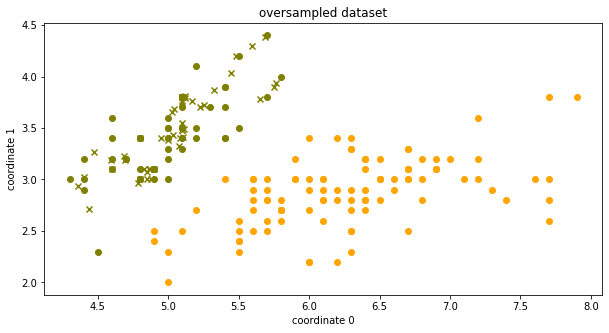

In [9]:
plt.figure(figsize=(10, 5))

plt.scatter(X[y == 0][:,0], X[y == 0][:,1], label='majority class', c='orange', marker='o')
plt.scatter(X[y == 1][:,0], X[y == 1][:,1], label='minority class', c='olive', marker='o')
plt.scatter(X_samp[y_samp == 1][:,0], X_samp[y_samp == 1][:,1], label='new minority samples', c='olive', marker='x')
plt.title('oversampled dataset')
plt.xlabel('coordinate 0')
plt.ylabel('coordinate 1')
plt.show()

In [10]:
oversampler= sv.SMOTE(nn_params={'metric_learning_method': 'ITML',
                                 'metric': 'minkowski'},
                        random_state=5)
X_samp, y_samp= oversampler.sample(X, y)

2022-07-03 19:45:45,484:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {'metric_learning_method': 'ITML', 'metric': 'minkowski'}, 'n_jobs': 1, 'random_state': 5}")
2022-07-03 19:45:45,487:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-07-03 19:45:45,489:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski


In [11]:
# filtering new samples
X_samp, y_samp= X_samp[len(X):], y_samp[len(y):]

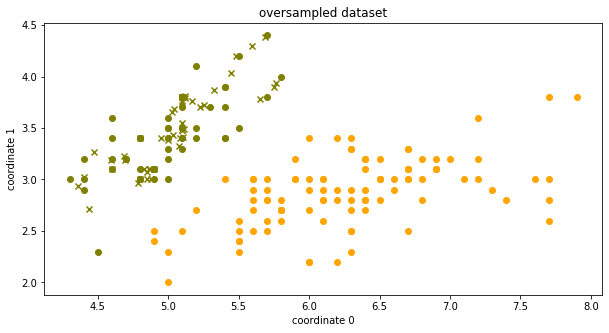

In [12]:
plt.figure(figsize=(10, 5))

plt.scatter(X[y == 0][:,0], X[y == 0][:,1], label='majority class', c='orange', marker='o')
plt.scatter(X[y == 1][:,0], X[y == 1][:,1], label='minority class', c='olive', marker='o')
plt.scatter(X_samp[y_samp == 1][:,0], X_samp[y_samp == 1][:,1], label='new minority samples', c='olive', marker='x')
plt.title('oversampled dataset')
plt.xlabel('coordinate 0')
plt.ylabel('coordinate 1')
plt.show()